### Harrison Pratt

# The Value of the Major League Baseball Pitcher

https://hpratt1.github.io/

## The Problem

Baseball teams are usually divided into two different parts: their offense led by their batters, and their defense led by their pitchers. Every offseason, Major League Baseball teams have to make an important decision: Should they spend their money on their batting or their pitching? In this study, I am going to attempt to form an answer to this question by observing how teams value their pitchers and whether they should pay them more or less.

## Retrieving and Tidying Data

**In this cell, I will read in the data from four csv files: Pitching.csv, Batting.csv, Salaries.csv, People.csv. After that, I will do some joins so that the full player name is in the batting and pitching dataframe and also get a pitchers and batters salaries dataframe**

In [77]:
# read in salaries.csv, pitching.csv, and people.csv into dataframes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
salaries_df = pd.read_csv("./data/Salaries.csv")
pitching_df = pd.read_csv("./data/Pitching.csv")
batting_df = pd.read_csv("./data/Batting.csv")
people_df = pd.read_csv("./data/People.csv")

# join pitching and people so that the player name is now part of pitching dataframe
pitching_df_names = pd.merge(pitching_df, people_df[["playerID", "nameFirst", "nameLast"]], on="playerID", how="left")

# get pitcher salary into pitching_df
pitching = pd.merge(pitching_df_names, salaries_df[["playerID", "yearID", "salary"]], on=["playerID", "yearID"], how="left")
# trim pitching salaries to only get years with relevant salary data
pitching_salaries = pitching[pitching["yearID"] >= 1985]
# drop any record that has NaN for a column
pitchers = pitching_salaries.dropna()
print("\nPitcher Statistics")
display(pitchers.head())

# join batting and people so that the player name is part of batting dataframe
batting_df_names = pd.merge(batting_df, people_df[["playerID", "nameFirst", "nameLast"]], on="playerID", how="left")
# get batter salary into batting dataframe
batting = pd.merge(batting_df_names, salaries_df[["playerID", "yearID", "salary"]], on=["playerID", "yearID"], how="inner")
# trim pitching salaries to only get years with relevant salary data
batting_salaries = batting[batting["yearID"] >= 1985]
# trim batters with less than 100 At Bats to get rid of pitchers from that table
batter_salaries = batting_salaries[batting_salaries["AB"] > 100]
# drop any record that has NaN for a column
batters = batter_salaries.dropna()
print("\n\nBatter Statistics")
display(batters.head())

#


Pitcher Statistics


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BK,BFP,GF,R,SH,SF,GIDP,nameFirst,nameLast,salary
24986,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,0,370.0,26,35,1.0,2.0,16.0,Jim,Acker,170000.0
24987,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,0,246.0,21,27,3.0,3.0,4.0,Juan,Agosto,147500.0
24989,alexado01,1985,1,TOR,AL,17,10,36,36,6,...,0,1090.0,0,105,6.0,3.0,15.0,Doyle,Alexander,875000.0
24990,allenne01,1985,1,SLN,NL,1,4,23,1,0,...,1,135.0,13,22,1.0,3.0,3.0,Neil,Allen,750000.0
24991,allenne01,1985,2,NYA,AL,1,0,17,0,0,...,0,124.0,10,9,0.0,0.0,3.0,Neil,Allen,750000.0




Batter Statistics


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,salary
2,aguaylu01,1985,1,PHI,NL,91,165,27,46,7,...,22,26.0,5.0,6.0,4.0,3.0,7.0,Luis,Aguayo,237000
6,almonbi01,1985,1,PIT,NL,88,244,33,66,17,...,22,61.0,0.0,1.0,4.0,3.0,6.0,Bill,Almon,255000
9,armasto01,1985,1,BOS,AL,103,385,50,102,17,...,18,90.0,4.0,2.0,0.0,5.0,14.0,Tony,Armas,915000
10,ashbyal01,1985,1,HOU,NL,65,189,20,53,8,...,24,27.0,2.0,1.0,1.0,1.0,9.0,Alan,Ashby,416667
13,backmwa01,1985,1,NYN,NL,145,520,77,142,24,...,36,72.0,1.0,1.0,14.0,3.0,3.0,Wally,Backman,200000


## Examine important statistics over time

**To provide a bit of context, I am going to set up a few graphs tracking some important statistics for pitchers such as earned run average and strikeouts, and for batters such as batting average and home runs**

### Track Pitching Statistics Over Time 

**Use line graphs to track earned run average and strikeouts over time**

Text(0.5, 0, 'Year')

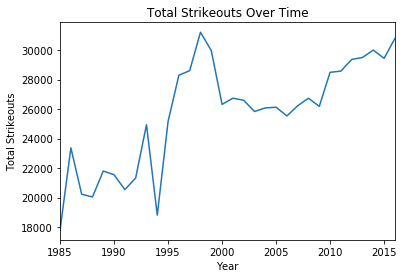

In [28]:
# plot total strikeouts over time on line graph
total_strikeouts = pitchers.groupby("yearID")["SO"].sum()
so_plot = total_strikeouts.plot.line(title="Total Strikeouts Over Time") 
so_plot.set_ylabel("Total Strikeouts")
so_plot.set_xlabel("Year")

**From the graph we can see that since 1985 total strikeouts have steadily increased with a massive rise around 1995 followed by a relatively small decline a couple of years after**

Text(0.5, 0, 'Year')

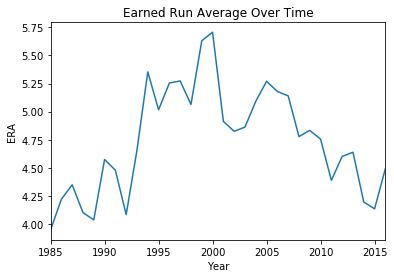

In [29]:
# plot earned run average over time on line graph
mean_era = pitchers.groupby("yearID")["ERA"].mean()
era_plot = mean_era.plot.line(title="Earned Run Average Over Time") 
era_plot.set_ylabel("ERA")
era_plot.set_xlabel("Year")

**From the graph we can see that ERA was increased up until around its peak in 2000, and since then it has steadily decreased, which means that pitching has improved since 2000**

### Track Batting Statistics Over Time

Text(0.5, 0, 'Year')

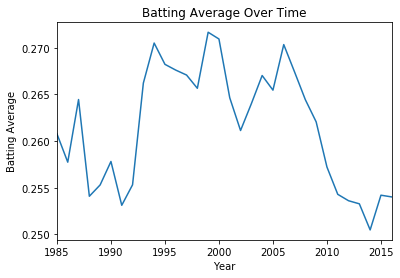

In [35]:
# create new column Batting Avg
avgs = []
for row in batters.iterrows():
    hits = row[1]["H"]
    atbats = row[1]["AB"]
    avg = hits/atbats
    avgs = avgs + [avg]
batters["AVG"] = avgs

# plot batting average over time on line graph
batting_average = batters.groupby("yearID")["AVG"].mean()
ba_plot = batting_average.plot.line(title="Batting Average Over Time") 
ba_plot.set_ylabel("Batting Average")
ba_plot.set_xlabel("Year")

**From the graph we can see that batting average had a major increase in the early 1990's and stayed high for a while until the late 2000's in which it had a precipitous drop and has been very low in the recent past**

Text(0.5, 0, 'Year')

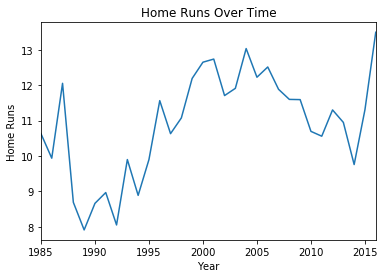

In [34]:
# plot batting average over time on line graph
home_runs = batters.groupby("yearID")["HR"].mean()
hr_plot = home_runs.plot.line(title="Home Runs Over Time") 
hr_plot.set_ylabel("Home Runs")
hr_plot.set_xlabel("Year")

**From the graph we can see that while home runs were increasing since 1990 they started to decrease starting around 2005 but recently there has been a massive increase in the number of home runs hit per season**

### Final Conclusions From Statistics Over Time

From analyzing these graphs, we can see that in the past decade there has been a decrease in batting average and earned run average, but an increase in home runs and strikeouts. These trends can be attributed to two main factors. The first factor is that batters are now attempting to hit for power instead of hitting for contact, which means that while there would be an increase in home runs, batting average would decrease and strikeouts would decrease. The second factor is that pitching has been improving, which would lower batting average and earned run average, while also increasing strikeouts.

## Comparing Mean Pitcher Salary and Mean Batter Salary 

**Use line graphs to compare average pitcher salary to average total player salary from 1985 to 2014**

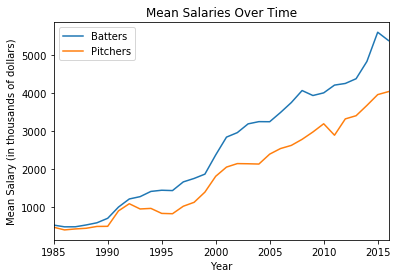

In [31]:
# get mean pitcher salaries
mean_pitcher_salaries = pitchers.groupby("yearID")["salary"].mean()/1000
# get mean batter salaries
mean_batter_salaries = batters.groupby("yearID")["salary"].mean()/1000
# plot mean salaries
mean_plot = mean_batter_salaries.plot.line(legend=True)
mean_pitcher_salaries.plot.line(ax=mean_plot, legend=True)
mean_plot.set_title("Mean Salaries Over Time")
mean_plot.set_ylabel("Mean Salary (in thousands of dollars)")
mean_plot.set_xlabel("Year")
mean_plot.legend(["Batters", "Pitchers"])

**From this graph we can see that from 1985 to 1990 the mean salary for each type of player was relatively even, but as the years have passed batters have gotten paid increasingly more than pitchers. So although pitching has improved recently, there has been no compensation for the pitchers to reflect this trend.**

## Compare Starting Pitcher and Relief Pitcher Salary

**One of the reasons that pitchers may be getting paid less than batters is that relief pitchers are often valued less than other positions, which would lower the overall mean pitcher salary. Therefore, in this part we want to compare salary for starting pitchers and relief pitchers to see if there is a difference**


Starting Pitcher Statistics


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BK,BFP,GF,R,SH,SF,GIDP,nameFirst,nameLast,salary
24989,alexado01,1985,1,TOR,AL,17,10,36,36,6,...,0,1090.0,0,105,6.0,3.0,15.0,Doyle,Alexander,875000.0
24993,andujjo01,1985,1,SLN,NL,21,12,38,38,10,...,0,1127.0,0,113,11.0,4.0,32.0,Joaquin,Andujar,1030000.0
24999,bannifl01,1985,1,CHA,AL,10,14,34,34,4,...,0,928.0,0,121,9.0,8.0,20.0,Floyd,Bannister,811250.0
25000,barkele01,1985,1,ATL,NL,2,9,20,18,0,...,0,335.0,1,55,4.0,1.0,4.0,Len,Barker,870000.0
25004,beattji01,1985,1,SEA,AL,5,6,18,15,1,...,0,335.0,1,61,0.0,5.0,5.0,Jim,Beattie,470000.0




Relief Pitcher Statistics


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BK,BFP,GF,R,SH,SF,GIDP,nameFirst,nameLast,salary
24986,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,0,370.0,26,35,1.0,2.0,16.0,Jim,Acker,170000.0
24987,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,0,246.0,21,27,3.0,3.0,4.0,Juan,Agosto,147500.0
24990,allenne01,1985,1,SLN,NL,1,4,23,1,0,...,1,135.0,13,22,1.0,3.0,3.0,Neil,Allen,750000.0
24991,allenne01,1985,2,NYA,AL,1,0,17,0,0,...,0,124.0,10,9,0.0,0.0,3.0,Neil,Allen,750000.0
24992,anderla02,1985,1,PHI,NL,3,3,57,0,0,...,1,318.0,19,41,3.0,1.0,4.0,Larry,Andersen,250500.0


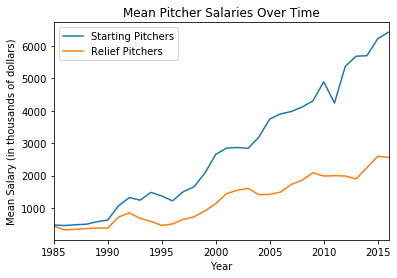

In [78]:
# starting pitchers are all the pitchers that have at least 5 games started
starting_pitchers = pitchers[pitchers["GS"] >= 5]
print("\nStarting Pitcher Statistics")
display(starting_pitchers.head())
# relief pitchers are all the pitchers that have less than 5 games started
relief_pitchers = pitchers[pitchers["GS"] < 5]
print("\n\nRelief Pitcher Statistics")
display(relief_pitchers.head())

# get mean starting pitcher salaries
mean_starter_salaries = starting_pitchers.groupby("yearID")["salary"].mean()/1000
# get mean relief pitchers salaries
mean_relief_salaries = relief_pitchers.groupby("yearID")["salary"].mean()/1000

# plot mean starting salaries and mean relief salaries over time
mean_pitchers_plot = mean_starter_salaries.plot.line(legend=True)
mean_relief_salaries.plot.line(ax=mean_pitchers_plot, legend=True)
mean_pitchers_plot.set_title("Mean Pitcher Salaries Over Time")
mean_pitchers_plot.set_ylabel("Mean Salary (in thousands of dollars)")
mean_pitchers_plot.set_xlabel("Year")
mean_pitchers_plot.legend(["Starting Pitchers", "Relief Pitchers"])

**This plot shows that starting pitchers are indeed valued more than relief pitchers since their salary has gotten progressivly larger than relief pitcher salary**

## Compare Mean Batter Salary and Mean Starting Pitcher Salary

**Now that we have seen that starting pitchers are valued much more than relief pitchers, we can compare starting pitchers and batters to see which one is valued more**

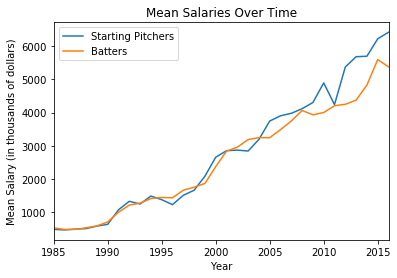

In [81]:
# plot mean starting salaries and mean relief salaries over time
mean_starters_plot = mean_starter_salaries.plot.line(legend=True)
mean_batter_salaries.plot.line(ax=mean_starters_plot, legend=True)
mean_starters_plot.set_title("Mean Salaries Over Time")
mean_starters_plot.set_ylabel("Mean Salary (in thousands of dollars)")
mean_starters_plot.set_xlabel("Year")
mean_starters_plot.legend(["Starting Pitchers", "Batters"])

**This plot shows that while starting pitchers and batters were getting paid almost the same exact amount for many years, since 2011 starting pitchers have actually gotten paid more than batters, which shows that while batters are valued more than relief pitchers, starting pitchers have recently been valued more than batters**

## Tracking Starting Pitching Statistics

**Since starting pitchers have recently been getting paid more in the last five years, we want to see what is valued in a pitcher that causes them to get larger contracts.**

Text(0.5, 0, 'Year')

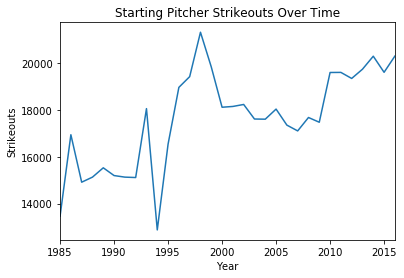

In [82]:
# plot starting pitchers strikeouts over time
starting_so = starting_pitchers.groupby("yearID")["SO"].sum()
st_so_plot = starting_so.plot.line(title="Starting Pitcher Strikeouts Over Time") 
st_so_plot.set_ylabel("Strikeouts")
st_so_plot.set_xlabel("Year")

**This graph strongly resembles the graph for all pitchers strikeouts, therefore there are no extra conclusions to be taken from this graph**

Text(0.5, 0, 'Year')

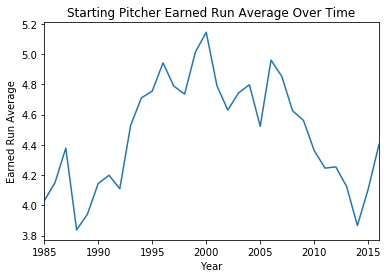

In [83]:
# plot starting pitchers earned run average over time
starting_era = starting_pitchers.groupby("yearID")["ERA"].mean()
st_era_plot = starting_era.plot.line(title="Starting Pitcher Earned Run Average Over Time") 
st_era_plot.set_ylabel("Earned Run Average")
st_era_plot.set_xlabel("Year")

**As with strikeouts, this graph also resembles the graph for all pitchers earned run average, therefore there is no conclusion that we can draw from this graph**

**With starting pitchers, their record is an important statistic so we are going to include that in the study as an extra statistic to track**

Text(0.5, 0, 'Year')

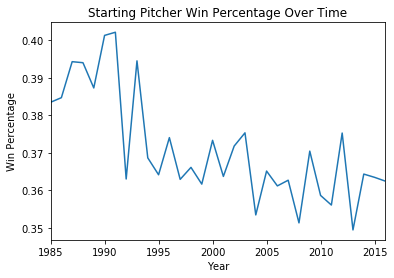

In [84]:
# Make new column called win percentage
winpct = []
for row in starting_pitchers.iterrows():
    wins = row[1]["W"]
    games = row[1]["GS"]
    pct = wins/games
    winpct = winpct + [pct]
starting_pitchers["win percentage"] = winpct

# plot starting pitchers win percentage over time
starting_winpct = starting_pitchers.groupby("yearID")["win percentage"].mean()
st_winpct_plot = starting_winpct.plot.line(title="Starting Pitcher Win Percentage Over Time") 
st_winpct_plot.set_ylabel("Win Percentage")
st_winpct_plot.set_xlabel("Year")

**According to this graph, we can see that starting pitcher win percentage has actually decreased over the years, so that is most likely not the reason that pitchers are being paid more, but that fact is not necessarily conclusive**

**In conclusion for this section, since there is no concrete discovery that we can draw from these graphs, we will have to take a different approach in trying to discover why starting pitchers have been so valuable recently**

## Identifying Statistics Leaders in the Last Five Years

**We want to identify the league leaders at each position in the last five years to identify the prime statistic on which pitchers are paid**


Top 10 Leaders in ERA


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BFP,GF,R,SH,SF,GIDP,nameFirst,nameLast,salary,win percentage
41666,medlekr01,2012,1,ATL,NL,10,1,50,12,2,...,520.0,7,26,1.0,0.0,13.0,Kris,Medlen,490000.0,0.833333
43717,greinza01,2015,1,LAN,NL,19,3,32,32,1,...,843.0,0,43,6.0,2.0,15.0,Zack,Greinke,25000000.0,0.593750
41738,paulife01,2012,1,KCA,AL,3,1,7,7,0,...,156.0,0,8,1.0,1.0,1.0,Felipe,Paulino,1900000.0,0.428571
44618,kershcl01,2016,1,LAN,NL,12,4,21,21,3,...,544.0,0,31,4.0,1.0,9.0,Clayton,Kershaw,33000000.0,0.571429
43318,smylydr01,2014,2,TBA,AL,3,1,7,7,1,...,173.0,0,9,1.0,0.0,3.0,Drew,Smyly,520000.0,0.428571
42032,buchhcl01,2013,1,BOS,AL,12,1,16,16,1,...,416.0,0,23,1.0,2.0,14.0,Clay,Buchholz,5750000.0,0.750000
43033,kershcl01,2014,1,LAN,NL,21,3,27,27,6,...,749.0,0,42,6.0,1.0,15.0,Clayton,Kershaw,4000000.0,0.777778
43453,arrieja01,2015,1,CHN,NL,22,6,33,33,4,...,870.0,0,52,4.0,1.0,15.0,Jake,Arrieta,3630000.0,0.666667
42301,kershcl01,2013,1,LAN,NL,16,9,33,33,3,...,908.0,0,55,8.0,3.0,20.0,Clayton,Kershaw,11750000.0,0.484848
44568,hillri01,2016,2,LAN,NL,3,2,6,6,0,...,128.0,0,7,1.0,1.0,0.0,Rich,Hill,6000000.0,0.500000




Top 10 Leaders in Strikeouts


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BFP,GF,R,SH,SF,GIDP,nameFirst,nameLast,salary,win percentage
43821,kershcl01,2015,1,LAN,NL,16,7,33,33,4,...,890.0,0,62,4.0,0.0,8.0,Clayton,Kershaw,32571000.0,0.484848
44916,scherma01,2016,1,WAS,NL,20,7,34,34,1,...,902.0,0,77,7.0,3.0,6.0,Max,Scherzer,22142857.0,0.588235
42109,darviyu01,2013,1,TEX,AL,13,9,32,32,0,...,841.0,0,68,0.0,5.0,17.0,Yu,Darvish,9500000.0,0.406250
44108,scherma01,2015,1,WAS,NL,14,12,33,33,4,...,899.0,0,74,11.0,2.0,5.0,Max,Scherzer,17142000.0,0.424242
44097,salech01,2015,1,CHA,AL,13,11,31,31,1,...,854.0,0,88,2.0,3.0,13.0,Chris,Sale,6000000.0,0.419355
43040,klubeco01,2014,1,CLE,AL,18,9,34,34,3,...,951.0,0,72,5.0,2.0,16.0,Corey,Kluber,514000.0,0.529412
45006,verlaju01,2016,1,DET,AL,16,9,34,34,2,...,903.0,0,81,4.0,7.0,8.0,Justin,Verlander,28000000.0,0.470588
44460,fernajo02,2016,1,MIA,NL,16,8,29,29,0,...,737.0,0,63,7.0,5.0,14.0,Jose,Fernandez,2800000.0,0.551724
43297,scherma01,2014,1,DET,AL,18,5,33,33,1,...,904.0,0,80,4.0,8.0,15.0,Max,Scherzer,15525000.0,0.545455
43450,archech01,2015,1,TBA,AL,12,13,34,34,1,...,868.0,0,85,2.0,2.0,10.0,Chris,Archer,1166667.0,0.352941




Top 10 Leaders in Win Percentage


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,BFP,GF,R,SH,SF,GIDP,nameFirst,nameLast,salary,win percentage
44820,phelpda01,2016,1,MIA,NL,7,6,64,5,0,...,352.0,6,23,1.0,2.0,7.0,David,Phelps,2500000.0,1.400000
44456,feldmsc01,2016,1,HOU,AL,5,3,26,5,0,...,265.0,9,27,4.0,3.0,4.0,Scott,Feldman,8000000.0,1.000000
43378,villaca01,2014,1,CHN,NL,5,7,42,5,0,...,343.0,15,42,3.0,2.0,3.0,Carlos,Villanueva,5000000.0,1.000000
43124,mejiaje01,2014,1,NYN,NL,6,6,63,7,0,...,417.0,49,41,2.0,0.0,10.0,Jenrry,Mejia,509675.0,0.857143
41666,medlekr01,2012,1,ATL,NL,10,1,50,12,2,...,520.0,7,26,1.0,0.0,13.0,Kris,Medlen,490000.0,0.833333
44760,nicasju01,2016,1,PIT,NL,10,7,52,12,0,...,513.0,9,64,5.0,7.0,8.0,Juan,Nicasio,3000000.0,0.833333
44017,priceda01,2015,2,TOR,AL,9,1,11,11,0,...,296.0,0,20,0.0,3.0,4.0,David,Price,19750000.0,0.818182
43305,shoemma01,2014,1,LAA,AL,16,4,27,20,0,...,543.0,5,49,3.0,5.0,9.0,Matt,Shoemaker,500500.0,0.800000
44671,lylesjo01,2016,1,COL,NL,4,5,40,5,0,...,273.0,7,46,1.0,2.0,6.0,Jordan,Lyles,2975000.0,0.800000
43033,kershcl01,2014,1,LAN,NL,21,3,27,27,6,...,749.0,0,42,6.0,1.0,15.0,Clayton,Kershaw,4000000.0,0.777778


Text(0, 0.5, 'Salary')

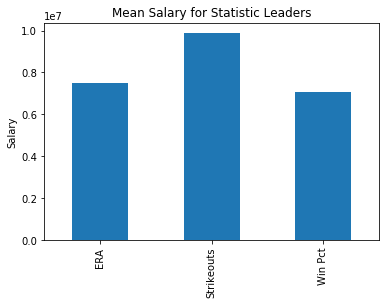

In [91]:
# get data frame with starting pitchers just from the last five years
starting_pitchers_recent = starting_pitchers[starting_pitchers["yearID"] > 2011]

# take top 100 earned run average pitcher seasons 
era_leaders = starting_pitchers_recent.sort_values(by=["ERA"])[:100]
print ("\nTop 10 Leaders in ERA")
display(era_leaders[:10])
# take the mean salary for these pitchers
mean_era_salary = era_leaders["salary"].mean()

# take top 100 strikeout pitcher seasons 
so_leaders = starting_pitchers_recent.sort_values(by=["SO"], ascending=False)[:100]
print ("\n\nTop 10 Leaders in Strikeouts")
display(so_leaders[:10])
# take the mean salary for these pitchers
mean_so_salary = so_leaders["salary"].mean()

# take top 100 win percentage pitcher seasons 
winpct_leaders = starting_pitchers_recent.sort_values(by=["win percentage"], ascending=False)[:100]
print ("\n\nTop 10 Leaders in Win Percentage")
display(winpct_leaders[:10])
# take the mean salary for these pitchers
mean_winpct_salary = winpct_leaders["salary"].mean()

data = [mean_era_salary, mean_so_salary, mean_winpct_salary]
ind = ["ERA", "Strikeouts", "Win Pct"]
mean_salary = pd.Series(data, index=ind) 
mean_statistic_bar = mean_salary.plot.bar(title="Mean Salary for Statistic Leaders")
mean_statistic_bar.set_ylabel("Salary")

**From this bar graph, it is clear to see that teams value strikeouts more than earned run average and win percentage, most likely because strikeouts are one of the main measures of a pitchers ability to complete dominate batters**

## Retrieve and Tidy Team Data

**I need to retrieve the teams data from Teams.csv because I will need data about their wins and losses from the past five years**

In [106]:
# read in teams data from csv file
teams = pd.read_csv("./data/Teams.csv")
# cut out all of the records that are in the year 2011 or before
recent_teams = teams[teams["yearID"] > 2011]

# create new column win percentage
winpcts = []
for row in recent_teams.iterrows():
    wins = row[1]["W"]
    games = row[1]["G"]
    pct = wins/games
    winpcts = winpcts + [pct]
recent_teams["Win Percentage"] = winpcts

# display teams dataframe
display(recent_teams.head())

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,Win Percentage
2685,2012,NL,ARI,ARI,W,3,162,81.0,81,81,...,0.985,Arizona Diamondbacks,Chase Field,2177617.0,105,106,ARI,ARI,ARI,0.500000
2686,2012,NL,ATL,ATL,E,2,162,81.0,94,68,...,0.986,Atlanta Braves,Turner Field,2420171.0,102,101,ATL,ATL,ATL,0.580247
2687,2012,AL,BAL,BAL,E,2,162,81.0,93,69,...,0.983,Baltimore Orioles,Oriole Park at Camden Yards,2102240.0,102,103,BAL,BAL,BAL,0.574074
2688,2012,AL,BOS,BOS,E,5,162,81.0,69,93,...,0.983,Boston Red Sox,Fenway Park II,3043003.0,106,106,BOS,BOS,BOS,0.425926
2689,2012,AL,CHA,CHW,C,2,162,81.0,85,77,...,0.988,Chicago White Sox,U.S. Cellular Field,1965955.0,106,106,CHW,CHA,CHA,0.524691


## View Relationship between Starting Pitcher Salary and Win Percentage

**We want to see the amount of money that each team spends on their starting pitching staff in the past five years**

Text(0, 0.5, 'Mean Salary (in thousands of dollars)')

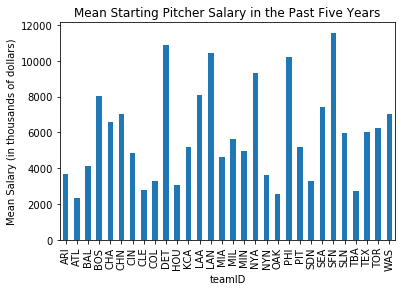

In [124]:
# get mean starting pitcher salary for each team from the past five years
team_starter_salaries = starting_pitchers_recent.groupby(["teamID", "yearID"])["salary"].mean()
mean_team_starter_salaries = team_starter_salaries.groupby("teamID").mean()/1000

# plot salaries on a bar graph
team_salary_bar = mean_team_starter_salaries.plot.bar(title = "Mean Starting Pitcher Salary in the Past Five Years")
team_salary_bar.set_ylabel("Mean Salary (in thousands of dollars)")

**From this bar graph, it is clear than teams such as the San Francisco Giants, the Detroit Tigers, and the Los Angeles Dodgers have all spent a lot of money on starting pitching. However, this information is not useful until we can see this spending as a proportion of their total payroll**

Text(0.5, 1.0, 'Proportion of Payroll Spent on Starting Pitching in Last Five Years')

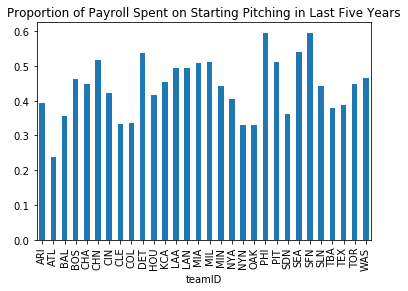

In [130]:
# get dataframe with recent relief pitching
recent_relief_pitching = relief_pitchers[relief_pitchers["yearID"] > 2011]

# get dataframe with recent batting
recent_batting = batters[batters["yearID"] > 2011]

# get series with mean relief pitcher salaries
team_reliever_salaries = recent_relief_pitching.groupby(["teamID", "yearID"])["salary"].mean()
mean_team_reliever_salaries = team_reliever_salaries.groupby("teamID").mean()/1000

# get series with mean batting salaries
team_batting_salaries = recent_batting.groupby(["teamID", "yearID"])["salary"].mean()
mean_team_batting_salaries = team_batting_salaries.groupby("teamID").mean()/1000

# get series with mean total salary
mean_total_salaries = mean_team_starter_salaries + mean_team_reliever_salaries + mean_team_batting_salaries

# get series with proportion of payroll spent on starting pitching
proportion_starter_salary = mean_team_starter_salaries/mean_total_salaries

# plot the proportion series
proportion_plot = proportion_starter_salary.plot.bar()
proportion_plot.set_title("Proportion of Payroll Spent on Starting Pitching in Last Five Years")

**With this graph it now gives an entirely new picture and we can see that while it is true that the San Francisco Giants are still at the top with their spending on starting pitching, the Philadelphia Phillies spend just as much and they weren't even top 3 on the last graph**

**Now that we have seen how much each team spends on starting pitching, we also want to see how this correlates with their winning percentage**

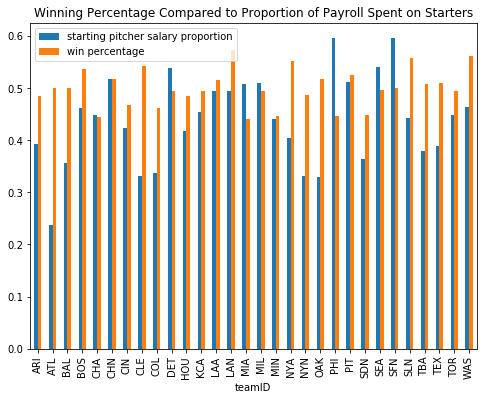

In [163]:
# get mean winning percentage for each time in the last five years
team_winning_pct = recent_teams.groupby("teamID")["Win Percentage"].mean()
# combine the two series into one dataframe
percentage_df = pd.concat([proportion_starter_salary, team_winning_pct], axis=1)
# rename win percentage column
percentage_df = percentage_df.rename(columns={'Win Percentage': 'win percentage', 'salary':'starting pitcher salary proportion'})
# make bar plot with winning percentage and salary
percentage_df.plot.bar(title = "Winning Percentage Compared to Proportion of Payroll Spent on Starters",figsize=(8,6))


**This bar graph does not necessarily give us anything conclusive about the relationship between winning percentage and proportion of payroll spent on starting pitchers, so instead we can try to make a scatter plot to see the correlation**

Text(0.5, 1.0, 'Winning Percentage Compared to Proportion of Payroll Spent on Starters')

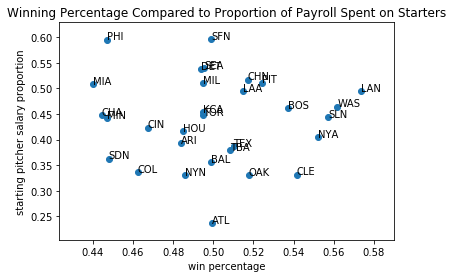

In [164]:
plt.figure()
plt.scatter(percentage_df["win percentage"], percentage_df["starting pitcher salary proportion"])
# add team label to each point
for row in percentage_df.iterrows():
    x = row[1]["win percentage"]
    y = row[1]["starting pitcher salary proportion"]
    val = row[0]
    plt.annotate(val, (x,y))
# add labels and title for the plot
plt.ylabel("starting pitcher salary proportion")
plt.xlabel("win percentage")
plt.title("Winning Percentage Compared to Proportion of Payroll Spent on Starters")

**There does not seem to be much correlation between win percentage and starting pitcher salary, so let's take a look at the relief pitcher salary proportion and the batter salary proportion**

Text(0.5, 1.0, 'Winning Percentage Compared to Proportion of Payroll Spent on Batters')

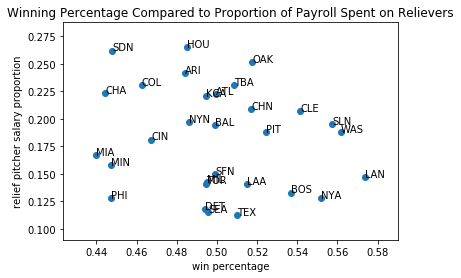

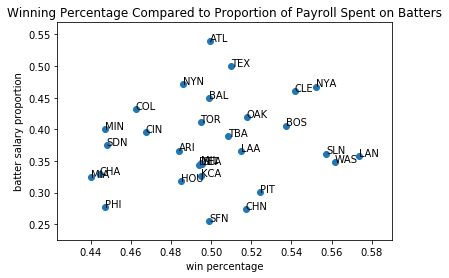

In [167]:
# get proportion of payroll spent on batting
proportion_batter_salary = mean_team_batting_salaries/mean_total_salaries
# get proportion of payroll spent on relievers
proportion_reliever_salary = mean_team_reliever_salaries/mean_total_salaries

# add two new series to the proportions dataframe
percentage_df["relief pitcher salary proportion"] = proportion_reliever_salary
percentage_df["batter salary proportion"] = proportion_batter_salary

# make a scatter plot with reliever proportions
plt.figure()
plt.scatter(percentage_df["win percentage"], percentage_df["relief pitcher salary proportion"])
# add team label to each point
for row in percentage_df.iterrows():
    x = row[1]["win percentage"]
    y = row[1]["relief pitcher salary proportion"]
    val = row[0]
    plt.annotate(val, (x,y))
# add labels and title for the plot
plt.ylabel("relief pitcher salary proportion")
plt.xlabel("win percentage")
plt.title("Winning Percentage Compared to Proportion of Payroll Spent on Relievers")

# make a scatter plot with batter proportions
plt.figure()
plt.scatter(percentage_df["win percentage"], percentage_df["batter salary proportion"])
# add team label to each point
for row in percentage_df.iterrows():
    x = row[1]["win percentage"]
    y = row[1]["batter salary proportion"]
    val = row[0]
    plt.annotate(val, (x,y))
# add labels and title for the plot
plt.ylabel("batter salary proportion")
plt.xlabel("win percentage")
plt.title("Winning Percentage Compared to Proportion of Payroll Spent on Batters")


**It is still difficult to see if there is any correlation between what position teams are spending their money on and their winning percentage, but luckily we can get a distinct number for the correlation using some quantitative analysis**

In [170]:
# Get correlation between starting pitcher salary proportion and winning percentage
starter_corr = percentage_df["win percentage"].corr(percentage_df["starting pitcher salary proportion"])

# Get correlation between relief pitcher salary proportion and winning percentage
reliever_corr = percentage_df["win percentage"].corr(percentage_df["relief pitcher salary proportion"])

# Get correlation between batter salary proportion and winning percentage
batter_corr = percentage_df["win percentage"].corr(percentage_df["batter salary proportion"])

# print output statements with the correlations
print("The Correlation between Win Percentage and Starting Pitcher Salary Proportion is " + str(starter_corr))
print("The Correlation between Win Percentage and Relief Pitcher Salary Proportion is " + str(reliever_corr))
print("The Correlation between Win Percentage and Batter Salary Proportion is " + str(batter_corr))

The Correlation between Win Percentage and Starting Pitcher Salary Proportion is -0.023688166554020656
The Correlation between Win Percentage and Relief Pitcher Salary Proportion is -0.1804829023461707
The Correlation between Win Percentage and Batter Salary Proportion is 0.15206873107748384


**These results tell us that there is almost zero correlation between how teams pay their players and how many games they win.**